[*********************100%***********************]  1 of 1 completed


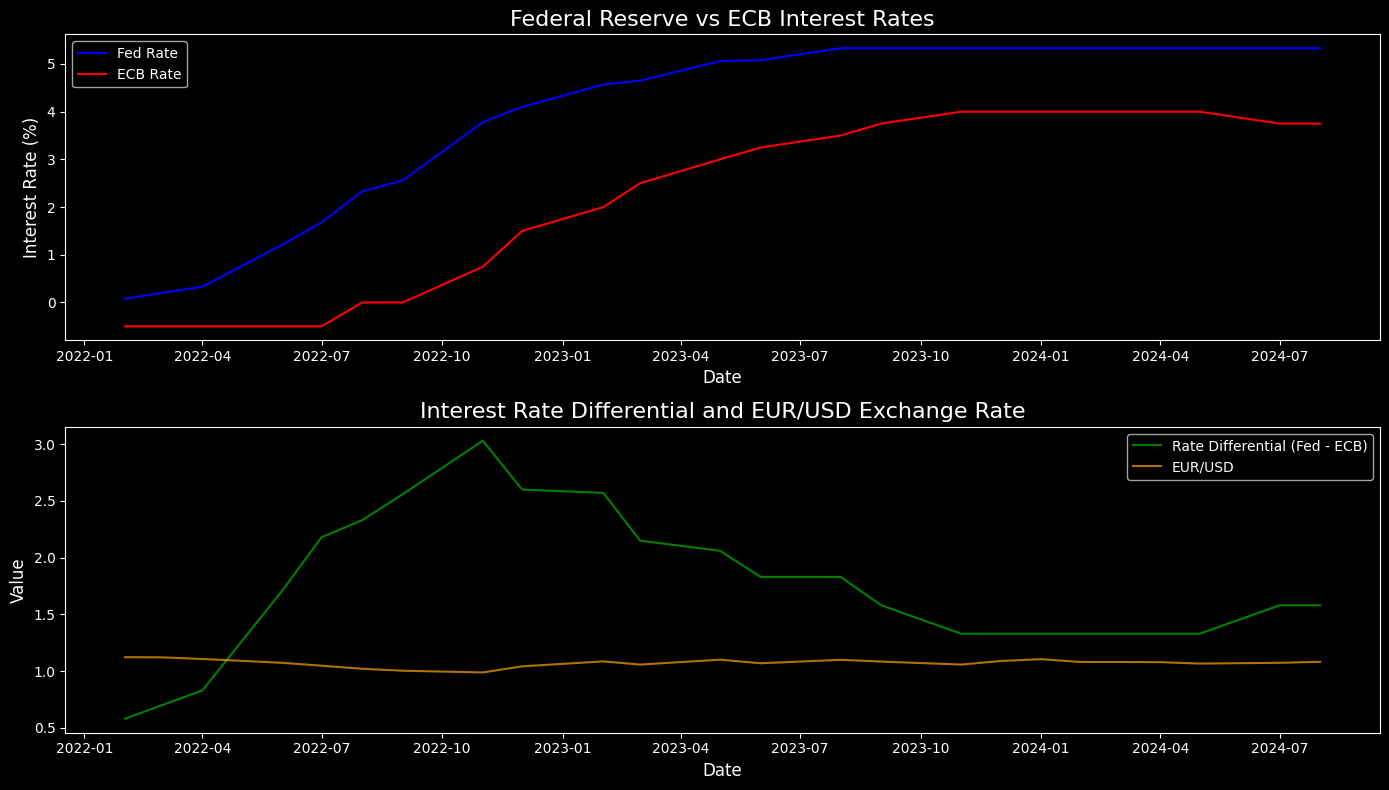

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from fredapi import Fred

# Define user parameters
start_date = '2022-01-01'
end_date = '2024-10-01'
currency_pair = 'EURUSD=X'

# FRED API key
fred_api_key = '495cd17849c9527846a6318bd3ecc94c'
fred = Fred(api_key=fred_api_key)

# Fetch historical interest rates with error handling
try:
    fed_rate = fred.get_series('FEDFUNDS', start=start_date, end=end_date)
    ecb_rate = fred.get_series('ECBDFR', start=start_date, end=end_date)  # Replace ECBDFR with correct ECB series
except Exception as e:
    print(f"Error fetching data from FRED: {e}")
    fed_rate, ecb_rate = pd.Series(), pd.Series()

# Fetch EUR/USD data with error handling
try:
    eur_usd = yf.download(currency_pair, start=start_date, end=end_date)
except Exception as e:
    print(f"Error fetching data from yfinance: {e}")
    eur_usd = pd.DataFrame()

# Combine data into a single DataFrame and drop missing values
if not fed_rate.empty and not ecb_rate.empty and not eur_usd.empty:
    rates_df = pd.DataFrame({
        'Fed Rate': fed_rate,
        'ECB Rate': ecb_rate,
        'EUR/USD': eur_usd['Close']
    }).dropna()

    # Calculate Interest Rate Differential
    rates_df['Rate Differential'] = rates_df['Fed Rate'] - rates_df['ECB Rate']

    # Plotting with black background
    plt.style.use('dark_background')
    plt.figure(figsize=(14, 8))

    # Plot Interest Rates
    plt.subplot(2, 1, 1)
    plt.plot(rates_df.index, rates_df['Fed Rate'], label='Fed Rate', color='blue')
    plt.plot(rates_df.index, rates_df['ECB Rate'], label='ECB Rate', color='red')
    plt.title('Federal Reserve vs ECB Interest Rates', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Interest Rate (%)', fontsize=12)
    plt.legend()

    # Plot Interest Rate Differential and EUR/USD
    plt.subplot(2, 1, 2)
    plt.plot(rates_df.index, rates_df['Rate Differential'], label='Rate Differential (Fed - ECB)', color='green')
    plt.plot(rates_df.index, rates_df['EUR/USD'], label='EUR/USD', color='orange', alpha=0.7)
    plt.title('Interest Rate Differential and EUR/USD Exchange Rate', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Data is not available for the specified time range or currency pair.")


1. Federal Reserve vs ECB Interest Rates:
The Fed Rate reflects the interest rate set by the U.S. Federal Reserve. It's the target interest rate at which commercial banks borrow and lend excess reserves overnight.
The ECB Rate represents the interest rate set by the European Central Bank for the Eurozone.
These interest rates are a key determinant of economic policy and currency valuations. In the chart, you’ll see how the Fed and ECB interest rates change over time, potentially in response to inflation, economic growth, or other macroeconomic conditions.
2. Interest Rate Differential:
The Interest Rate Differential is the difference between the Fed Rate and the ECB Rate. It indicates the gap between the monetary policies of the U.S. and Eurozone.
A positive differential (Fed Rate > ECB Rate) suggests that U.S. interest rates are higher, which can attract more foreign capital into U.S. assets, often strengthening the U.S. dollar.
A negative differential would imply higher Eurozone interest rates, potentially attracting investment into Europe instead.
3. EUR/USD Exchange Rate:
This is the exchange rate between the Euro and the U.S. dollar (EUR/USD). It represents how many U.S. dollars one Euro can buy.
The exchange rate is influenced by many factors, including the interest rate differential. Higher interest rates in one region can attract investors, increasing demand for that currency and causing its value to rise.
Key Relationships:
If the Fed rate increases more quickly than the ECB rate, this can lead to a stronger U.S. dollar, which may be reflected by a lower EUR/USD exchange rate (fewer dollars needed to buy one Euro).
Conversely, if the ECB rate increases relative to the Fed rate, it may strengthen the Euro, pushing the EUR/USD rate higher.
The Interest Rate Differential plot helps us visualize these shifts in monetary policy and how they might correlate with changes in the exchange rate.
In summary, the data helps us observe:

Monetary policy trends between the U.S. and Eurozone.
How these policies potentially impact currency values (specifically EUR/USD).
The relationship between interest rate differentials and capital flows between regions